In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

time.perf_counter()
start = time.time()

# set parameters
n_samples = 10000
n_step = 10000
# 在（0，0）生成黑洞
# 在以（0，0）为圆心，r=sqrt(n_samples)的圆盘内生成均匀的点

# genarte data

# initial condition
r = np.random.uniform(0, 10000, n_samples)
theta = np.random.uniform(0, 2*np.pi, n_samples)
x = r*np.cos(theta)
y = r*np.sin(theta)
vx = np.random.normal(size=n_samples)*5
vy = np.random.normal(size=n_samples)*5

# random walk
x_rand = []
y_rand = []
print("Genarating data>>>")
for i in tqdm(range(n_step)):
    x_rand.append(np.random.random(n_samples) *
                  np.cos(np.random.uniform(0, 2*np.pi, n_samples)))
    y_rand.append(np.random.random(n_samples) *
                  np.sin(np.random.uniform(0, 2*np.pi, n_samples)))

# caculate
print("Caculating>>>")
n = 0
for step in tqdm(range(n_step)):
    r2 = x**2 + y**2
    F = 100000 / r2**1.5
    ax = -F * x
    ay = -F * y
    vx += ax
    vy += ay
    x += x_rand[step] + vx
    y += y_rand[step] + vy
'''
    if (step % 50 == 0):
        plt.figure(figsize=(10,10))
        plt.plot([0],[0], 'ro', markersize=5)
        plt.plot(x, y, 'bo', markersize=3, alpha=0.2)
        plt.xlim(-n_samples , n_samples )
        plt.ylim(-n_samples , n_samples )
        plt.savefig('./fig/%d.png' % n)
        plt.cla()
        plt.close()
        n = n+1
'''

end = time.time()
elapse = end - start
print('total time: ' + str(elapse))
#saveGif.main(n)

  1%|          | 76/10000 [00:00<00:13, 752.08it/s]

Genarating data>>>


  2%|▏         | 160/10000 [00:00<00:06, 1594.72it/s]

Caculating>>>


100%|██████████| 10000/10000 [00:04<00:00, 2052.55it/s]

total time: 16.190216064453125


In [5]:
#Save gif
import imageio


def create_gif(image_list, gif_name):

    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    # Save them as frames into a gif
    imageio.mimsave(gif_name, frames, 'GIF', duration=0.005)
    print("Complete !")
    return


def main(n):
    image_list = []
    for i in range(n):
        image_list.append('./fig/'+str(i) + '.png')
    gif_name = 'created_gif'
    create_gif(image_list, gif_name)


if __name__ == "__main__":
    main(n)

Complete !


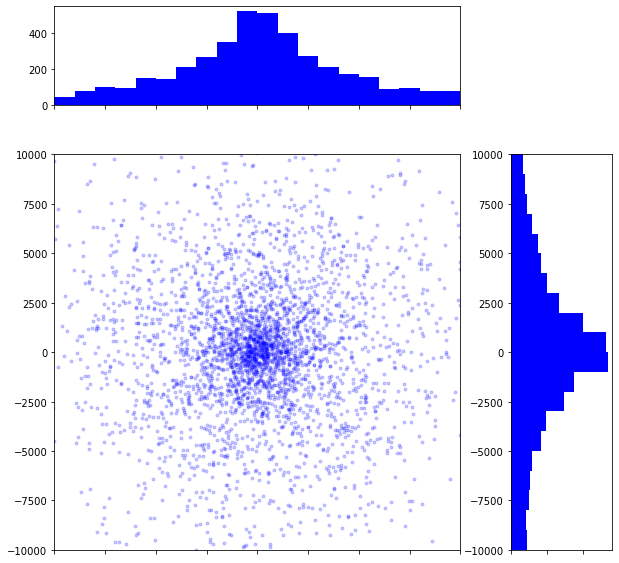

In [2]:
plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, wspace=0.5, hspace=0.5)

main_ax = plt.subplot(grid[1:4, 0:3])
plt.plot(x, y, 'bo', markersize=3, alpha=0.2)
plt.xlim(-n_samples, n_samples)
plt.ylim(-n_samples, n_samples)

y_hist = plt.subplot(grid[1:4, 3], xticklabels=[], sharey=main_ax)
plt.hist(y, 20, range=(-n_samples, n_samples), orientation='horizontal', color='blue')

x_hist = plt.subplot(grid[0, 0:3], xticklabels=[], sharex=main_ax)
plt.hist(x, 20, range=(-n_samples, n_samples), orientation='vertical', color='blue')

plt.show()

In [3]:
v = (vx**2+vy**2)/2

In [4]:
data = np.concatenate([x.reshape(-1,1),y.reshape(-1,1),v.reshape(-1,1)], axis=1)
len(data)

10000

In [5]:
data

array([[-3.02387875e+04,  1.29051142e+04,  3.88635683e+00],
       [-1.89009138e+04, -8.77835635e+04,  3.41387547e+01],
       [-9.69005131e+02,  2.79109494e+03,  1.76542210e+01],
       ...,
       [ 3.88245462e+04,  1.34387996e+04,  4.41684598e+00],
       [ 4.40775529e+04, -5.71577066e+04,  2.37157351e+01],
       [ 3.68095452e+06, -4.10760533e+06,  1.55828126e+05]])

In [7]:
mask1 = abs(data[:,0])<1000
DATA = data[mask1]
mask2 = abs(DATA[:,1])<1000
DATA = DATA[mask2]
xi = DATA[:,0]
yi = DATA[:,1]
zi = DATA[:,2]


In [8]:
DATA

array([[ 971.89428364,  817.13945466,   25.09018943],
       [ 679.91586993,  365.39677607,   69.53474476],
       [-554.17887584,  504.00713609,  102.87438275],
       ...,
       [ -74.49833075,  -79.76433831,  329.74528263],
       [ 614.84909499,  408.33375351,  103.9310664 ],
       [ 536.37872924, -517.12162803,   43.42190151]])

In [9]:
import matplotlib.tri as tri 
triang = tri.Triangulation(xi, yi)
interpolator = tri.LinearTriInterpolator(triang, zi)
X, Y = np.meshgrid(xi, yi)
Z = interpolator(X, Y)

In [10]:
xi

array([ 971.89428364,  679.91586993, -554.17887584, -301.25443529,
       -329.40292944,  523.28038787,  112.32909599,  -81.11842599,
       -454.3418913 ,  127.94070801,  819.28981174, -519.92454523,
        266.23077264,  334.52446851, -475.47253439,  491.89441837,
       -504.27067211, -422.59436978,  464.87015259, -839.72062111,
        445.26369493, -340.26240044, -899.12587683, -388.15594614,
       -579.85445047,  -13.03934005, -597.31708144,  634.02245363,
        135.16412987, -184.88048911, -338.82812724,  281.41214576,
       -167.1080692 , -406.31403343, -308.70567847,  485.0016047 ,
       -345.37440006, -710.36559251, -497.80613558,  -73.78984474,
        966.86582296,  195.0442448 ,  959.22044705,  580.14949804,
       -996.92521229,  478.46778085, -908.95311774,  478.90075559,
        -93.94924011,  749.90643317,  205.76165174, -114.16869381,
        105.83631783,  316.08446419,  412.0864659 ,  164.66169172,
       -832.72655863,  264.91350934,  -89.94144418, -212.90741

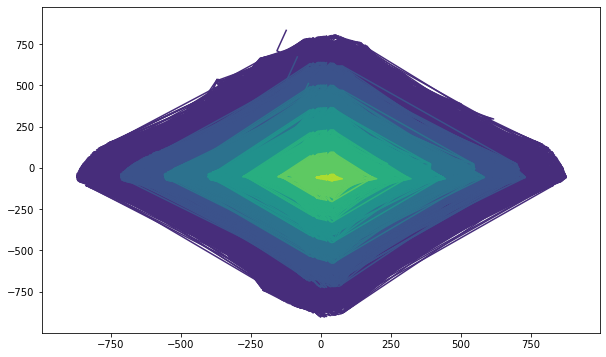

In [12]:
plt.figure(figsize=(10,6))
#填充颜色，f即filled
#plt.contourf(X,Y,Z)
#画等高线
plt.contour(X,Y,Z)
plt.show()

In [43]:
x.reshape(-1,1)

array([[-24684.23148249],
       [ -2802.35721733],
       [-27513.11227566],
       ...,
       [  3691.15762451],
       [  3930.17293881],
       [-99403.64806642]])

In [50]:
a = np.array([-1,1])
mask = a>0 
mask = mask+mask
mask

array([False,  True])

In [49]:
findIndex(x[1], y[1])

(1.8238743815899563, 0.6812267497879287)

(1.8238743815899563, 0.6812267497879287)